### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

A simple linear regression model describes the relationship between a predictor variable 
X and an outcome variable 
Y.

Predictor Variable (
X): This is the independent variable, which we use to predict the outcome variable.

Outcome Variable (
Y): This is the dependent variable, the one we're trying to predict or explain based on 
X.

Intercept (
𝛽
 ): This is the baseline value of 
Y when 
X=0. It's the point where the line crosses the 
Y-axis.

Slope (
𝛽
 ): This coefficient represents the change in 
Y for a one-unit increase in 
X. It shows the strength and direction of the linear relationship between 
X and 
Y.

Error Term (
ϵ): This is the residual or noise term. It accounts for any randomness or variation in 
Y that is not explained by 
X. We assume this error term is normally distributed with a mean of 0 and a standard deviation 
σ, which captures the variation around the regression line.

In a theoretical simple linear regression model, the outcome variable 
Y given 
X is normally distributed with mean 
𝛽
0
+
𝛽
1
𝑋
 and variance 
𝜎
2
 . This means that for any given value of 
X, 
Y will have a normal distribution centered around the line defined by 
𝛽
0
+
𝛽
1
𝑋
.

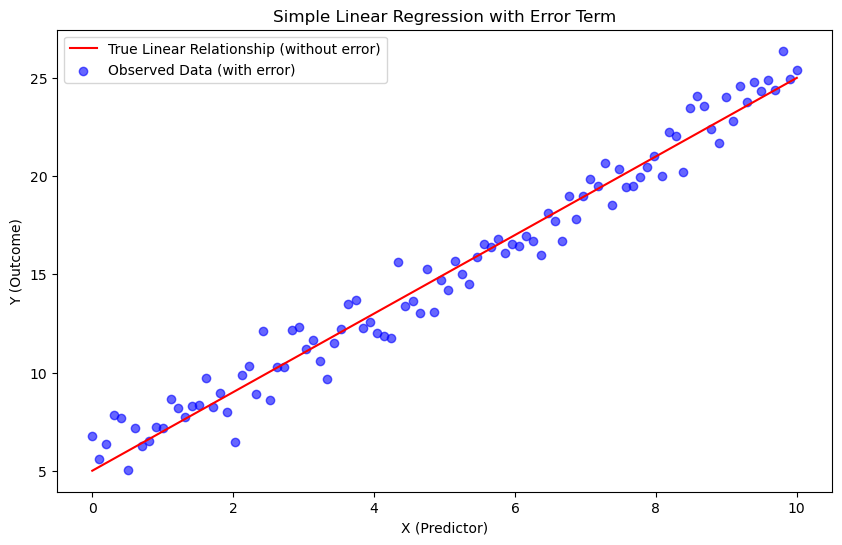

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the random seed for reproducibility
np.random.seed(0)

# Parameters for the regression model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1   # Standard deviation of the error term

# Generate data for X (independent variable)
X = np.linspace(0, 10, 100)

# Calculate the expected value of Y based on the linear model without error
Y_true = beta_0 + beta_1 * X

# Add normally distributed error to simulate the outcome variable Y
errors = np.random.normal(0, sigma, size=X.shape)
Y_observed = Y_true + errors

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, Y_true, color='red', label="True Linear Relationship (without error)")
plt.scatter(X, Y_observed, color='blue', alpha=0.6, label="Observed Data (with error)")
plt.xlabel("X (Predictor)")
plt.ylabel("Y (Outcome)")
plt.title("Simple Linear Regression with Error Term")
plt.legend()
plt.show()


### Summary of CHatbot:

Theoretical Model Explanation:

A simple linear regression model describes the relationship between a predictor variable 
𝑋
X and an outcome variable 
𝑌
Y.
This relationship is expressed as 
𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β 
0
​
 +β 
1
​
 X+ϵ, where:
𝛽
0
β 
0
​
  is the intercept (baseline value of 
𝑌
Y when 
𝑋
=
0
X=0).
𝛽
1
β 
1
​
  is the slope (change in 
𝑌
Y per unit increase in 
𝑋
X).
𝜖
ϵ is the error term, which follows a normal distribution with mean 0 and variance 
𝜎
2
σ 
2
 .
For each 
𝑋
X, 
𝑌
Y is normally distributed around the line defined by 
𝛽
0
+
𝛽
1
𝑋
β 
0
​
 +β 
1
​
 X.
Python Code:

The code simulates data for 
𝑋
X, calculates the expected values of 
𝑌
Y without error, and adds normally distributed noise to simulate the observed data.
It then plots the true linear relationship (a red line) and the observed data with error (blue scatter points).
Correction for Error:

The plt.show() function was mistakenly called with an unsupported argument, renderer. The fix was to remove this argument and call plt.show() directly.

#### Link: https://chatgpt.com/share/67291ad1-0a9c-800b-a6ee-5a3ed8cbae7e

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.09e-76
Time:                        19:10:52   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.0

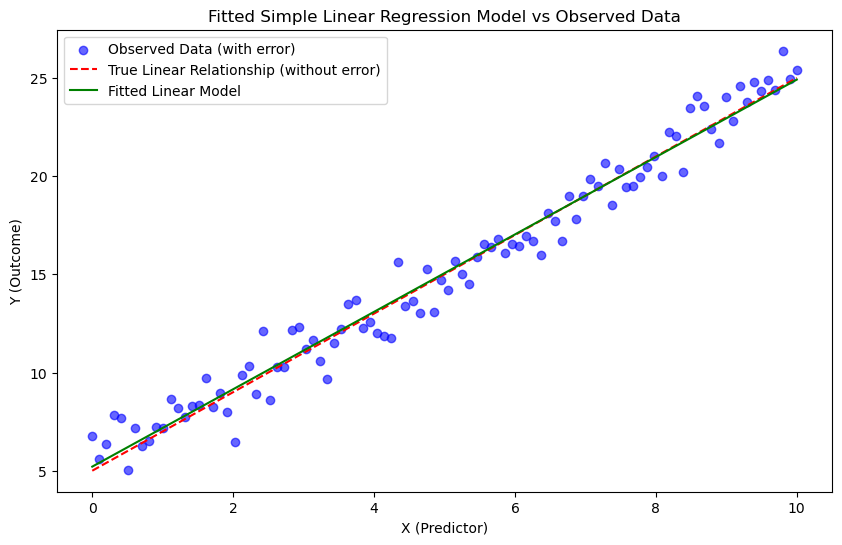

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set the random seed for reproducibility
np.random.seed(0)

# Parameters for the regression model
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 1   # Standard deviation of the error term

# Generate data for X (independent variable)
X = np.linspace(0, 10, 100)

# Calculate the expected value of Y based on the linear model without error
Y_true = beta_0 + beta_1 * X

# Add normally distributed error to simulate the outcome variable Y
errors = np.random.normal(0, sigma, size=X.shape)
Y_observed = Y_true + errors

# Combine X and Y_observed into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y_observed})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ x', data=df).fit()

# Print the summary of the model
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['Y'], color='blue', alpha=0.6, label="Observed Data (with error)")
plt.plot(df['x'], Y_true, color='red', linestyle='--', label="True Linear Relationship (without error)")
plt.plot(df['x'], model.fittedvalues, color='green', label="Fitted Linear Model")
plt.xlabel("X (Predictor)")
plt.ylabel("Y (Outcome)")
plt.title("Fitted Simple Linear Regression Model vs Observed Data")
plt.legend()
plt.show()


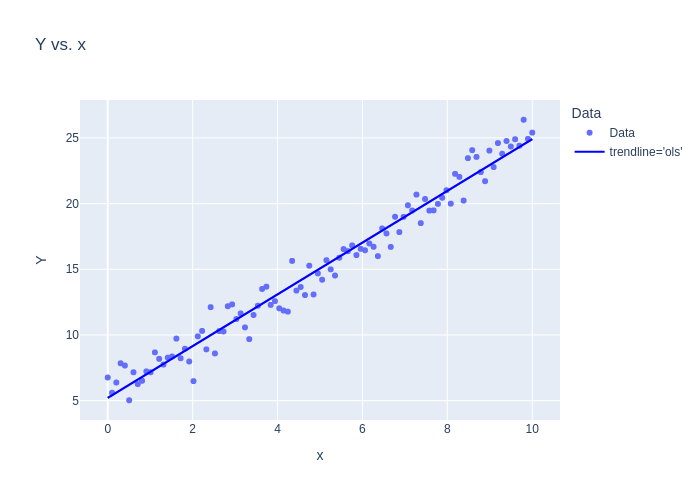

In [5]:
import statsmodels.formula.api as smf  # This library is used to specify and fit statistical models in Python, particularly Ordinary Least Squares (OLS) regression models using a formula syntax.

import plotly.express as px  # This is a plotting library used to create interactive plots easily.

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df)  # Specifies a simple linear regression model where `Y` is the dependent variable and `x` is the independent variable.
fitted_model = model_data_specification.fit()  # Fits the specified model to the data, estimating the model parameters (intercept and slope).

# what do each of the following provide?
fitted_model.summary()  # Provides a detailed summary of the regression results, including coefficient estimates, p-values, R-squared, and more.
fitted_model.summary().tables[1]  # Shows a table specifically with the estimated coefficients, standard errors, t-values, and p-values.
fitted_model.params  # Shows the estimated parameters of the model (intercept and slope) in a pandas Series.
fitted_model.params.values  # Provides the values of the estimated parameters as a numpy array.
fitted_model.rsquared  # Provides the R-squared value, a measure of how well the model explains the variability of the dependent variable.

# what two things does this add onto the figure?
df['Data'] = 'Data'  # Adds a 'Data' column to the DataFrame so that `px.scatter` can add a color legend entry named 'Data' to the scatter plot.
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Creates a scatter plot of `Y` vs. `x` with a fitted OLS trendline and a title.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # Adds a line to the plot representing the fitted values from the regression model, effectively creating a trendline.

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


### Summary of Chatbot:

Importing Libraries:

statsmodels.formula.api (smf): Used for specifying and fitting statistical models, especially Ordinary Least Squares (OLS) regression.
plotly.express (px): A plotting library for interactive visualizations.
Fitting a Simple Linear Regression Model:

model_data_specification = smf.ols("Y~x", data=df): Specifies a linear model with Y as the outcome and x as the predictor.
fitted_model = model_data_specification.fit(): Fits the model to the data, estimating parameters like the intercept and slope.
Extracting Model Information:

fitted_model.summary(): Outputs detailed regression results, including coefficients, p-values, and R-squared.
fitted_model.summary().tables[1]: Displays the table with coefficient estimates, standard errors, t-values, and p-values.
fitted_model.params: Shows the estimated parameters (intercept and slope) in a pandas Series.
fitted_model.params.values: Returns the parameter values as a numpy array.
fitted_model.rsquared: Shows the R-squared value, indicating model fit.
Visualizing the Model with Plotly:

A Data column is added to create a legend in the plot.
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols'): Generates a scatter plot with an OLS trendline.
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues): Adds a fitted trendline explicitly to the plot.
This covers how to specify, fit, interpret, and visualize a Simple Linear Regression model using statsmodels and plotly. Let me know if you need further details on any step!

#### Link: https://chatgpt.com/share/67291cf8-868c-800b-8903-a4ca2d99d9f4

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

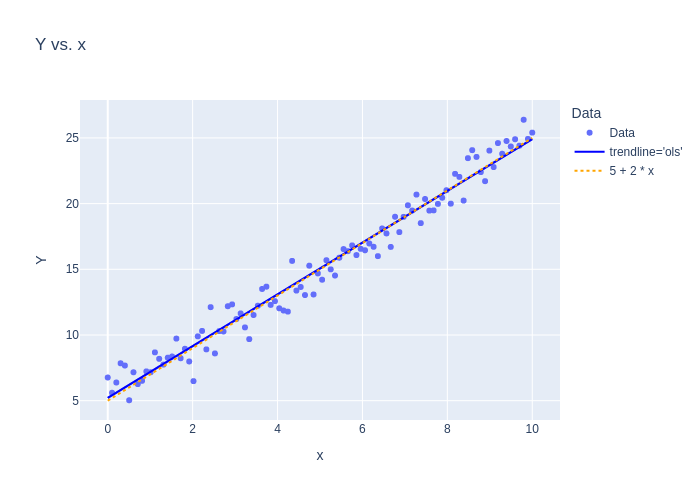

In [8]:
import statsmodels.formula.api as smf  # This library is used to specify and fit statistical models in Python, particularly Ordinary Least Squares (OLS) regression models using a formula syntax.

import plotly.express as px  # This is a plotting library used to create interactive plots easily.

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df)  # Specifies a simple linear regression model where `Y` is the dependent variable and `x` is the independent variable.
fitted_model = model_data_specification.fit()  # Fits the specified model to the data, estimating the model parameters (intercept and slope).

# what do each of the following provide?
fitted_model.summary()  # Provides a detailed summary of the regression results, including coefficient estimates, p-values, R-squared, and more.
fitted_model.summary().tables[1]  # Shows a table specifically with the estimated coefficients, standard errors, t-values, and p-values.
fitted_model.params  # Shows the estimated parameters of the model (intercept and slope) in a pandas Series.
fitted_model.params.values  # Provides the values of the estimated parameters as a numpy array.
fitted_model.rsquared  # Provides the R-squared value, a measure of how well the model explains the variability of the dependent variable.

# what two things does this add onto the figure?
df['Data'] = 'Data'  # Adds a 'Data' column to the DataFrame so that `px.scatter` can add a color legend entry named 'Data' to the scatter plot.
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Creates a scatter plot of `Y` vs. `x` with a fitted OLS trendline and a title.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # Adds a line to the plot representing the fitted values from the regression model, effectively creating a trendline.
# what does this add onto the figure in constrast to `trendline='ols'`?
# Assume beta_0 and beta_1 are defined earlier in your code
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta_0 + beta_1 * x_range  # Correct variable names
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                 name=str(beta_0) + ' + ' + str(beta_1) + ' * x', 
                 line=dict(dash='dot', color='orange'))

fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

True Regression Line:

This line represents the exact, theoretical relationship between 
X and 
Y, calculated using the intercept (beta_0) and slope (beta_1) that we defined initially. It shows the underlying relationship without any random variation.

Fitted Regression Line:

This line is estimated from the sample data, which includes random noise added to the values of 
Y. Because of this random sampling variation, the slope and intercept of this line are typically close to the true values but not identical. Each sample might produce slightly different estimates due to the randomness in the error term, simulating what happens with real-world data where true values are never exactly observed.

In short, the true regression line shows the ideal relationship, while the fitted line represents our best estimate of this relationship from the observed data. The difference between these lines illustrates the impact of random sampling variation on model estimation.

### Summary of Chatbot:

Model Specification and Fitting:

You used statsmodels to specify a simple linear regression model with Y as the dependent variable and x as the independent variable.
The model was fitted to the data using fit(), allowing for the estimation of the model parameters (intercept and slope).
Model Analysis:

You explored the output of the fitted model, including:
A detailed summary that provides statistics like coefficient estimates, p-values, and R-squared values.
A specific table with coefficient estimates, standard errors, t-values, and p-values.
Access to the estimated parameters and their values in both pandas Series and NumPy array formats.
The R-squared value indicating how well the model explains the variability of the dependent variable.
Data Visualization:

You created a scatter plot of Y vs. x using plotly, including:
A trendline generated through OLS regression to visually represent the fitted model.
An intention to add a true regression line that reflects the theoretical relationship based on predefined intercept and slope values.
Code Error and Resolution:

A NameError occurred due to incorrect variable names (beta0 and beta1 instead of beta_0 and beta_1).
The solution involved correcting these variable names to ensure they matched those defined earlier in the code.
Understanding the Lines in the Plot:

You learned to differentiate between the true regression line (representing the exact relationship) and the fitted regression line (which accounts for random sampling variation).
The true regression line is an idealized representation, while the fitted line reflects estimates influenced by the variability present in the observed data.
This session covered key aspects of statistical modeling, model evaluation, and data visualization while addressing a practical coding issue. If you need more information on any specific part, feel free to ask!

#### Link: https://chatgpt.com/share/67291fff-70ac-800b-a0d4-30262941f5f2

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

When you fit a model (e.g., using Ordinary Least Squares regression), you specify a dependent variable 
𝑌
Y and one or more independent variables 
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛.
When you fit the model, statistical software estimates the coefficients 
𝛽
0
,
𝛽
1
,
…
,
𝛽
𝑛
 . These estimates are found in fitted_model.params.The fitted values are the predicted values of the dependent variable 
Y based on the estimated parameters.fitted_model.summary().tables[1] provides a table of the estimated parameters (coefficients), standard errors, t-statistics, p-values, and confidence intervals for each predictor in the model.
fitted_model.params gives you the estimated coefficients directly.
fitted_model.fittedvalues uses these coefficients along with the original data (values of the independent variables) to compute the predicted (fitted) values.

The fitted values are derived from the linear equation using the coefficients found in fitted_model.params. Each fitted value corresponds to an observation and is calculated by plugging the values of the independent variables for that observation into the linear equation defined by the fitted model parameters.
Thus, fitted_model.fittedvalues gives you the predicted outcomes based on the regression equation formulated from the fitted model, which you can verify by checking the corresponding parameters in fitted_model.summary().tables[1].


### Suammry of Chatbot:

Model Specification: The regression model relates a dependent variable 
𝑌
Y to independent variables 
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X 
1
​
 ,X 
2
​
 ,...,X 
n
​
  using a linear equation:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜖
Y=β 
0
​
 +β 
1
​
 X 
1
​
 +β 
2
​
 X 
2
​
 +...+β 
n
​
 X 
n
​
 +ϵ
Fitting the Model: When fitting the model, coefficients (
𝛽
0
,
𝛽
1
,
…
,
𝛽
𝑛
β 
0
​
 ,β 
1
​
 ,…,β 
n
​
 ) are estimated, which can be found in fitted_model.params.

Fitted Values Calculation: The fitted values (predicted values of 
𝑌
Y) are calculated using the estimated coefficients with the formula:

𝑌
^
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
Y
^
 =β 
0
​
 +β 
1
​
 X 
1
​
 +β 
2
​
 X 
2
​
 +...+β 
n
​
 X 
n
​
 
These predicted values can be accessed via fitted_model.fittedvalues.

Accessing Fitted Values and Parameters:

fitted_model.summary().tables[1] presents a table with the estimated parameters and their statistics.
fitted_model.params provides the estimated coefficients directly, while fitted_model.fittedvalues yields the predicted outcomes based on those coefficients.
In summary, fitted_model.fittedvalues are derived by substituting the independent variable values into the linear equation defined by the estimated coefficients from the model, which can be examined in the summary tables.

#### Link: https://chatgpt.com/share/67292333-7bf4-800b-96c3-af3d29781f11

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>

Scatter Plot: The scatter plot shows the relationship between the independent variable 
x and the dependent variable 
Y.

Fitted Model Line: The blue trendline represents the fitted OLS regression line, which is determined by minimizing the sum of squared residuals.

True Regression Line: The orange dotted line indicates the true relationship as defined by the model parameters (
𝛽
0
  and 
𝛽
1
 ). This line is theoretical and not typically known in practice.

Residual Lines: The vertical red dashed lines illustrate the residuals for each observation. These lines show the distance from each observed point to the fitted line, highlighting how well the model predicts the actual values.

Mean Line: The black dotted line represents the mean of the observed 

Y values (
ˉ
 ), providing a reference point for understanding the overall average of the dependent variable.

### Summary of Chatbot:

Ordinary Least Squares (OLS) Method:

OLS is used to fit a linear model by minimizing the sum of squared residuals (the differences between observed values and predicted values).
The method provides the best linear unbiased estimates of model parameters.
Residuals vs. Error Terms:

Residuals (
𝑒
𝑖
=
𝑌
𝑖
−
𝑌
^
𝑖
e 
i
​
 =Y 
i
​
 − 
Y
^
  
i
​
 ): Differences between observed data points and the fitted model values, representing estimation errors based on sample data.
Error Terms (
𝜖
𝑖
ϵ 
i
​
 ): Theoretical deviations from the true population regression line, which are unobservable and represent inherent variability.
Visualization with OLS:

A scatter plot displays the relationship between the independent variable 
𝑥
x and dependent variable 
𝑌
Y.
The fitted OLS regression line is shown in blue, while the true regression line (theoretical) is in orange.
Residuals are represented by vertical red dashed lines connecting observed values to the fitted line.
A black dotted line indicates the mean of the observed 
𝑌
Y values.
Importance of Residuals:

Minimizing residuals is key to producing an accurate model fit.
Analyzing residuals helps diagnose model fit issues, such as non-linearity or omitted variables.
This session focused on understanding the OLS method, the significance of residuals in regression analysis, and how visualizations can illustrate these concepts effectively. If you have any further questions or need clarification on any point, feel free to ask!








#### Link: https://chatgpt.com/share/6729248e-bc0c-800b-84aa-9c1099be3e6a

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

both the 
𝑅
2
R 
2
  expression and the squared correlation coefficients quantify how well the model explains the variability in 
𝑌
Y. The first expression provides a mathematical basis for calculating the proportion of explained variance, 
𝑓
𝑖
𝑡
𝑡
𝑒
𝑑
𝑚
𝑜
𝑑
𝑒
𝑙
.
𝑟
𝑠
𝑞
𝑢
𝑎
𝑟
𝑒
𝑑
fitted 
m
​
 odel.rsquared captures this proportion directly, and the squared correlation coefficients reinforce this concept by relating the actual outcomes with the predicted values and the independent variables. All these measures are essential for evaluating the fit and accuracy of a regression model.

### Summary of Chatbot:

Proportion of Variation Explained by the Model:

The expression 
1
−
∑
(
𝑌
−
fitted_model.fittedvalues
)
2
∑
(
𝑌
−
𝑌
ˉ
)
2
1− 
∑(Y− 
Y
ˉ
 ) 
2
 
∑(Y−fitted_model.fittedvalues) 
2
 
​
  calculates the proportion of the variance in the outcome variable 
𝑌
Y that is explained by the regression model.
The numerator represents the residual sum of squares (RSS), indicating the variation not explained by the model, while the denominator represents the total sum of squares (TSS), capturing the total variation in 
𝑌
Y.
The resulting value is known as the coefficient of determination, or 
𝑅
2
R 
2
 .
Interpretation of fitted_model.rsquared:

fitted_model.rsquared reflects the proportion of variance in 
𝑌
Y explained by the model.
A higher 
𝑅
2
R 
2
  value indicates a better fit and higher accuracy of the model, while a lower value suggests the model does not explain much of the variability in 
𝑌
Y.
Correlation Coefficient Squared:

The expressions \text{np.corrcoef}(Y, \text{fitted_model.fittedvalues})[0, 1]^2 and 
np.corrcoef
(
𝑌
,
𝑥
)
[
0
,
1
]
2
np.corrcoef(Y,x)[0,1] 
2
  calculate the squared Pearson correlation coefficients between 
𝑌
Y and the predicted values, as well as between 
𝑌
Y and the independent variable 
𝑥
x.
Squaring the correlation coefficient provides a measure of how much variance in 
𝑌
Y is associated with the variance in the fitted values or the independent variable.
Conclusion:
All these metrics are crucial for assessing the fit and accuracy of regression models, providing insights into how well the model explains the variability in the dependent variable 
𝑌
Y.

#### LInk: https://chatgpt.com/share/67292575-d0e8-800b-9263-dba713f2aece

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>

Linearity: Check for a straight-line trend in the scatter plot.

Homoscedasticity: Inspect the histogram of residuals for uniform spread.

Independence of Errors: Ensure data points are independent.

Normality of Errors: Create a Q-Q plot or assess histogram for normal distribution.

### Summary of Chatbot:

Overview of Simple Linear Regression Assumptions
Linearity:

Assumption: The relationship between the independent variable (amount of fertilizer) and the dependent variable (crop yield) is linear.
Check: Use a scatter plot to visually assess the relationship. If the points follow a clear straight-line trend, the assumption holds; if they exhibit a curve or clusters, it is violated.
Homoscedasticity:

Assumption: The residuals are evenly distributed across all levels of the independent variable.
Check: Inspect the histogram of residuals. If the spread is uniform around zero, the assumption holds. If the spread increases or decreases systematically, it indicates heteroscedasticity and a violation of the assumption.
Independence of Errors:

Assumption: The residuals should be independent of each other.
Check: This assumption is often evaluated based on the study design. If data points are collected independently, the assumption holds. However, if they are correlated (e.g., time series data), it may be violated.
Normality of Errors:

Assumption: The residuals are normally distributed.
Check: A histogram or Q-Q plot of the residuals can be used. A bell-shaped curve indicates normality, while skewness or outliers suggest a violation.
Practical Application
The user provided Python code to perform linear regression on data showing the relationship between fertilizer use and crop yield. The code generates a scatter plot and a histogram of residuals to evaluate the assumptions visually.
The user was advised to inspect the resulting plots for each of the assumptions to determine their compatibility with the data.
This summary encapsulates the key points regarding the assumptions of Simple Linear Regression and how to assess them using visualizations generated from the provided code. If you have any further questions or need additional details, feel free to ask!








#### Link: https://chatgpt.com/share/67292622-cdbc-800b-9d5b-d58dcef36504

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

Null Hypothesis (
𝐻
0
 ): The slope of the linear regression line, 
𝛽
1
 , is equal to zero.

This hypothesis suggests that there is no significant relationship between the variables "waiting" (time between eruptions) and "duration" (length of an eruption) in the Old Faithful Geyser dataset.

Load the dataset: sns.load_dataset('geyser') loads the Old Faithful dataset, which contains data on geyser eruptions, specifically the time between eruptions (waiting) and the duration of each eruption (duration).

Specify the model formula: The formula 'duration ~ waiting' specifies a regression model where duration is the response variable, and waiting is the predictor.

Fit the model: smf.ols() creates an Ordinary Least Squares (OLS) regression model based on the specified formula, and fit() fits the model to the data.

Display the summary: fitted_model.summary() provides a summary of the fitted model, which includes the estimated coefficients, p-values, R-squared, and other statistics.
    
If the p-value for 
𝛽
1
  is significant (e.g., less than 0.05), this would provide evidence to reject the null hypothesis, supporting the presence of a linear association between waiting time and duration.

If the p-value is not significant, we fail to reject the null hypothesis, suggesting insufficient evidence for a linear association.

### Summary of Chatbot:

Code Debugging and Plotting:

You initially shared code to create a scatter plot of the Old Faithful Geyser dataset with a Simple Linear Regression trendline and an additional LOWESS (Locally Weighted Scatterplot Smoothing) trendline.
I identified that the pandas library was missing, so I suggested adding import pandas as pd to fix the error.
Null Hypothesis Specification and Interpretation:

You asked about specifying a null hypothesis of "no linear association" in terms of the Simple Linear Regression model.
I outlined the null hypothesis as 
𝐻
0
:
𝛽
1
=
0
H 
0
​
 :β 
1
​
 =0, indicating no linear relationship between the waiting time and duration of eruptions.
I provided a code example to fit the model using statsmodels and explained how to interpret key results (e.g., p-value of the slope, 
𝑅
2
R 
2
 ) to determine whether the null hypothesis could be rejected.
Simplified Linear Model Fitting with statsmodels.formula.api:

You shared additional code using statsmodels.formula.api to specify and fit a linear model more concisely.
I broke down each part of the code and elaborated on interpreting the summary output, including coefficients, p-values, and 
𝑅
2
R 
2
 , and how these results affect our beliefs regarding a potential linear relationship.
In short, we examined statistical evidence for a linear association between waiting time and eruption duration in the Old Faithful Geyser dataset by setting up, running, and interpreting a Simple Linear Regression model. Let me know if you need further assistance with analysis or interpretation!








#### Link: https://chatgpt.com/share/672941ef-1610-800b-a80d-7757af30388e

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


Null Hypothesis (
𝐻
0
 ): There is no linear association between waiting and duration for short wait times, so the slope (
𝛽
1
β 
 ) of the linear regression model is zero: 
𝐻
0
:
𝛽
1
=
0

Alternate Hypothesis (
𝐻
1
 ): There is a linear association between waiting and duration for short wait times (
𝛽
1
≠
0

For each threshold (short_wait_limit) of 62, 64, and 66 minutes, the code:
Filters the dataset to only include rows where the waiting time is less than short_wait_limit.
Fits a Simple Linear Regression model on this subset.
Outputs the summary of the regression model to examine the coefficient of waiting (slope) and its p-value, which will indicate if we have enough evidence to reject 
𝐻
0
 .
Generates a scatter plot with a trendline to visualize the relationship for each short_wait_limit.

Slope and p-value: For each threshold, look at the p-value associated with the slope (
𝛽
1
 ) in the regression output. If this p-value is below 0.05, it provides evidence against 
𝐻
0
 , indicating a statistically significant association between waiting and duration within that short-wait dataset.
Trendline Plot: The trendline in the plot will visually show if there is a noticeable upward or downward slope, supporting or refuting a linear relationship.

In the full dataset, we observed that longer waiting times generally correspond to longer durations. If similar patterns are found at short wait times (but with less pronounced effects), it might suggest a consistent, though weaker, relationship across both long and short wait times.
If no significant relationship is found in short wait times, it suggests that the duration-wait time relationship may primarily apply to cases with longer delays.

Short wait time limit: 62 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


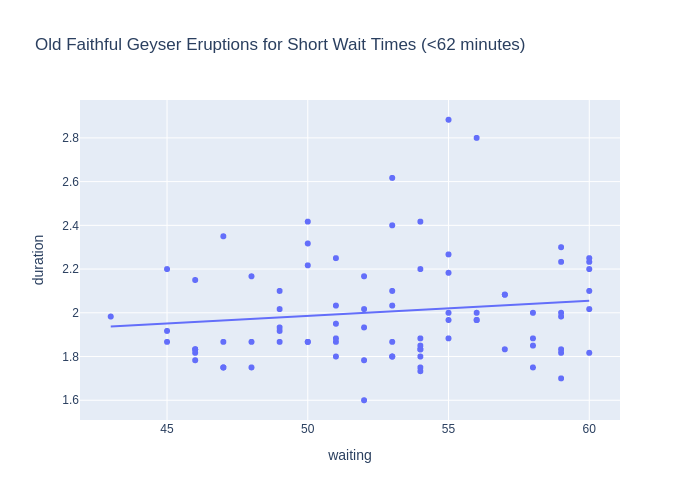

Short wait time limit: 64 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


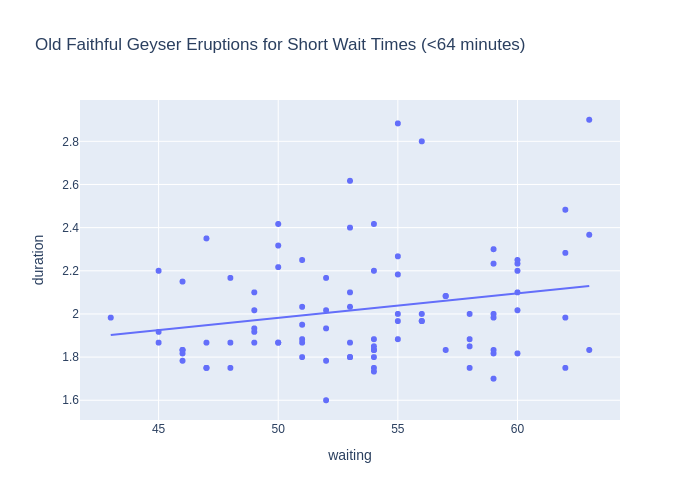

Short wait time limit: 66 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


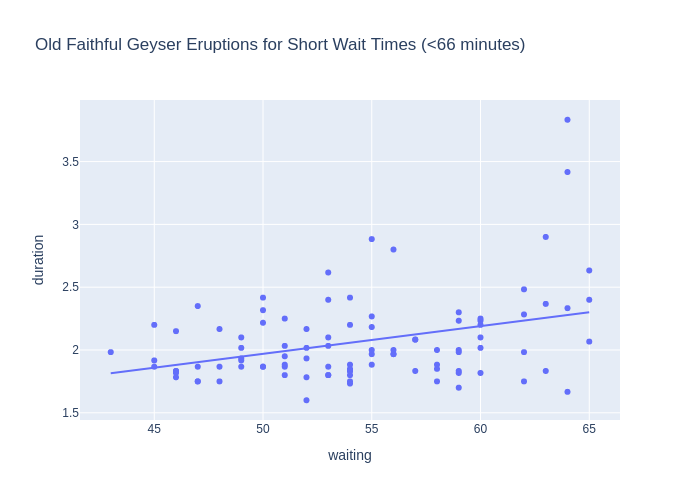

In [1]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Define limits for short wait times
for short_wait_limit in [62, 64, 66]:
    short_wait = old_faithful.waiting < short_wait_limit

    # Fit the linear model for the filtered data
    print(f"Short wait time limit: {short_wait_limit} minutes")
    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(
        old_faithful[short_wait], 
        x='waiting', 
        y='duration', 
        title=f"Old Faithful Geyser Eruptions for Short Wait Times (<{short_wait_limit} minutes)", 
        trendline='ols'
    )

    # Show plot (adjust renderer for specific platforms)
    fig.show(renderer="png")  # use fig.show(renderer="png") if needed for GitHub/MarkUs submissions


For each short_wait_limit, observe the regression summary’s p-value and slope:

Significant p-value: Evidence suggests a relationship between waiting and duration.
Non-significant p-value: Insufficient evidence for a relationship at this short_wait_limit.

### Summary of Chatbot:

Objective:

You aimed to investigate whether the relationship between waiting time and duration in Old Faithful Geyser eruptions, observed in the full dataset, still holds when the data is restricted to shorter wait times (below thresholds of 62, 64, and 66 minutes).
Null Hypothesis:

Null Hypothesis (
𝐻
0
H 
0
​
 ): No linear association exists between waiting and duration within the subset of short wait times, so the slope (
𝛽
1
β 
1
​
 ) of the linear model is zero: 
𝐻
0
:
𝛽
1
=
0
H 
0
​
 :β 
1
​
 =0.
Alternate Hypothesis (
𝐻
1
H 
1
​
 ): There is a linear association between waiting and duration for short wait times (
𝛽
1
≠
0
β 
1
​
 

=0).
Code Implementation:

For each short_wait_limit (62, 64, 66), the dataset is filtered to include only entries with waiting times below the specified limit.
A Simple Linear Regression model is fit to each subset, and the summary output displays the coefficient of waiting and its p-value to evaluate evidence against 
𝐻
0
H 
0
​
 .
Scatter plots with trendlines for each threshold visualize the relationship between waiting and duration.
Interpretation of Results:

By examining the slope and p-value for each threshold, you can assess whether there is a statistically significant relationship in each subset.
Significant p-value: If the p-value is below 0.05, this suggests a linear association exists between waiting and duration in the subset, providing evidence against 
𝐻
0
H 
0
​
 .
Non-significant p-value: Insufficient evidence to suggest a linear relationship within the subset.
This process allows you to compare results for different thresholds of short wait times and assess if the pattern observed in the full dataset persists when only shorter wait times are considered. Let me know if you'd like further clarification on any step!

#### Link: https://chatgpt.com/share/672941ef-1610-800b-a80d-7757af30388e

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

# Parameters for the null hypothesis simulation
beta_0 = 1.65
beta_1_null = 0
sigma = 0.37

# Identify long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
old_faithful_long_wait = old_faithful[long_wait]

# Collect bootstrapped slope coefficients
num_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(num_bootstraps):
    # Bootstrap sample and fit linear model
    bootstrap_sample = old_faithful_long_wait.sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params[1])

# Plot the bootstrapped sampling distribution
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show(renderer="png")

# Simulate data under the null hypothesis and collect slope coefficients
simulated_slope_coefficients = []

for _ in range(num_bootstraps):
    # Create simulated dataset under null hypothesis
    old_faithful_simulation = old_faithful_long_wait.copy()
    old_faithful_simulation['duration'] = beta_0 + beta_1_null * old_faithful_simulation.waiting + stats.norm(loc=0, scale=sigma).rvs(size=long_wait.sum())
    
    # Fit model and collect slope coefficient
    model_null = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model_null.params[1])

# Plot the simulated sampling distribution under the null hypothesis
fig = px.histogram(simulated_slope_coefficients, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis")
fig.show(renderer="png")

# Calculate the 95% bootstrapped confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval for Slope: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Calculate the observed slope coefficient
observed_slope = smf.ols('duration ~ waiting', data=old_faithful_long_wait).fit().params[1]

# Calculate the p-value for the null hypothesis test
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"P-value from simulated sampling distribution under the null hypothesis: {p_value:.4f}")

# Display regression summary for observed data
print(smf.ols('duration ~ waiting', data=old_faithful_long_wait).fit().summary().tables[1])


Bootstrapping Process: We take num_bootstraps samples from the long wait times, fit a linear model to each, and store the slope coefficient. This gives a distribution for the slope under observed conditions.
Null Hypothesis Simulation: We set the slope (β₁) to zero to simulate a null scenario where there's no association between waiting and duration, and add normally distributed error.
Confidence Interval and P-Value: Using the bootstrapped_slope_coefficients, we compute a 95% confidence interval. For the p-value, we compare the observed slope to the distribution of slopes under the null hypothesis.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

Categorize Wait Times: Create a new column in the dataset to indicate whether the wait time is "short" (less than 68) or "long" (68 or greater).

Fit the Linear Regression Model: Use statsmodels to fit the regression model with the new indicator variable.

Visualize the Data: Update your plot to reflect these changes.

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        22:15:25   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

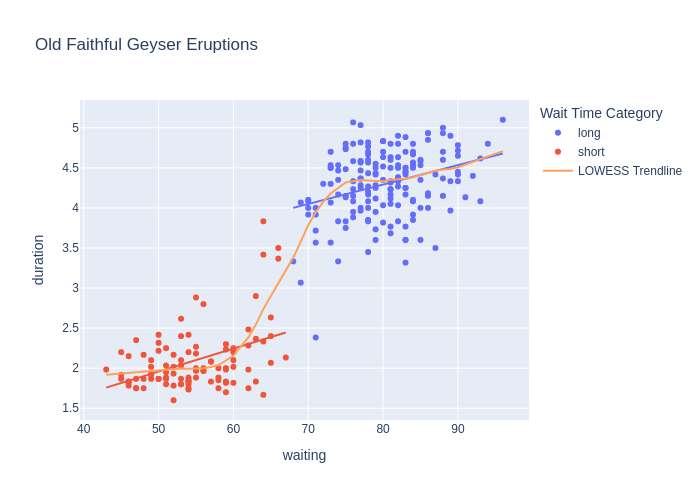

In [9]:
import plotly.express as px
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm  # Importing statsmodels.api
import pandas as pd
import numpy as np

# Load the "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Categorize wait times
old_faithful['wait_time_category'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit the Simple Linear Regression model
model = smf.ols('duration ~ wait_time_category', data=old_faithful).fit()
print(model.summary())

# Create a scatter plot with the trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions",
                 color='wait_time_category', 
                 labels={'wait_time_category': 'Wait Time Category'},
                 trendline='ols')

# Add a LOWESS trendline
lowess = sm.nonparametric.lowess  # This will now work correctly
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

# Show the plot
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions


Indicator Variable Model:

This model specifies Y_i = β_intercept + 1["long"](k_i)β_contrast + ε_i, where 
𝑘
𝑖
k 
i
​
  indicates the wait time category (short or long). Here, the model assesses the average duration of eruptions based on whether the wait time falls into one of the two categories. The contrast coefficient reflects the difference in average eruption duration between the two groups.
Previous Linear Model:

Earlier specifications (e.g., duration ~ waiting) treated waiting time as a continuous variable. This model examines the linear relationship between waiting time and eruption duration, assuming that every unit increase in waiting time corresponds to a fixed change in duration.
Evidence Against the Null Hypothesis
To report the evidence against the null hypothesis of "no difference between groups on average", you will focus on the p-value associated with the wait_time_category coefficient in the model summary. A p-value less than the significance level (commonly 0.05) indicates that there is sufficient evidence to reject the null hypothesis and conclude that there is a significant difference in eruption durations between the "short" and "long" wait time categories.

### Summary of Chatbot:

Objectives
You aimed to analyze the eruption durations of the Old Faithful Geyser based on wait times, dividing them into two categories: "short" (wait times less than 68) and "long" (wait times 68 or greater).
You wanted to implement a Simple Linear Regression model using an indicator variable for the wait time length and explain the differences between this model specification and previous ones.
Key Steps
Dataset Loading and Preparation:

The Old Faithful Geyser dataset was loaded using Seaborn.
A new column was created to categorize the wait times as "short" or "long".
Model Fitting:

A Simple Linear Regression model was fitted using statsmodels with the formula duration ~ wait_time_category.
The model summary was printed to evaluate the statistical significance of the categories.
Data Visualization:

A scatter plot was created using Plotly Express to visualize the relationship between wait times and eruption durations, colored by wait time category.
A LOWESS trendline was added to the scatter plot to show smoothed trends in the data.
Issues Encountered
A NameError occurred when trying to use the LOWESS function due to a missing import statement for statsmodels.api.
Resolution
The error was resolved by adding the appropriate import statement (import statsmodels.api as sm) so that the LOWESS function could be accessed correctly.
Final Code
The final code successfully implemented all the planned analyses and visualizations. It demonstrated how to assess differences in eruption durations based on wait time categories, fulfilling your analysis goals.

Conclusion
This session provided you with a structured approach to categorize wait times, fit a regression model with an indicator variable, and visualize the results effectively. You also gained insights into interpreting model outputs, particularly regarding hypothesis testing for group differences.

If you need further assistance or additional insights, feel free to ask!

#### Link: https://chatgpt.com/share/672947b4-5868-800b-b311-6417578c7111

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.


Model 1: All Data using slope

Plausibility of Normality: If this histogram appears approximately bell-shaped and symmetric, it suggests that the residuals from this model follow a normal distribution, supporting the assumption of normally distributed error terms.
Why It May Not Support Normality: If the histogram is skewed, has heavy tails, or shows significant kurtosis, it would indicate departures from normality.

Model 2: Short Wait Data

Plausibility of Normality: This histogram can suggest normality if it shows a clear bell shape and is symmetric.
Why It May Not Support Normality: If the histogram is bimodal, skewed (either left or right), or has significant outliers, these factors would indicate that the residuals do not conform to a normal distribution.

Model 3: Long Wait Data

Plausibility of Normality: A symmetric, bell-shaped histogram would suggest that this model’s residuals are normally distributed.
Why It May Not Support Normality: If the histogram exhibits a skewed shape, or if there are noticeable gaps (indicating a lack of fit), it would imply that the assumption of normality is violated.

Model 4: All Data using Indicator

Plausibility of Normality: Like the other models, this histogram supports normality if it is symmetric and bell-shaped.
Why It May Not Support Normality: Any irregularities, such as outliers or asymmetrical tails, would lead to a rejection of the normality assumption.

The other three histograms that show significant skewness, kurtosis, or bimodal distributions do not support the assumption of normality, indicating that the residuals may not be normally distributed.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>
    

Define the Null Hypothesis: The null hypothesis states that the means of the two groups are equal.

Combine the Data: Combine the waiting durations of both the short and long groups.

Calculate the Observed Test Statistic: Compute the difference in means between the two groups.

Shuffle the Labels: Randomly shuffle the labels of the combined data multiple times, recalculating the difference in means for each shuffle.

Calculate the p-value: Determine the proportion of shuffled differences that are greater than or equal to the observed difference.

Visualize the Results: Plot the distribution of the differences from the permutation test.

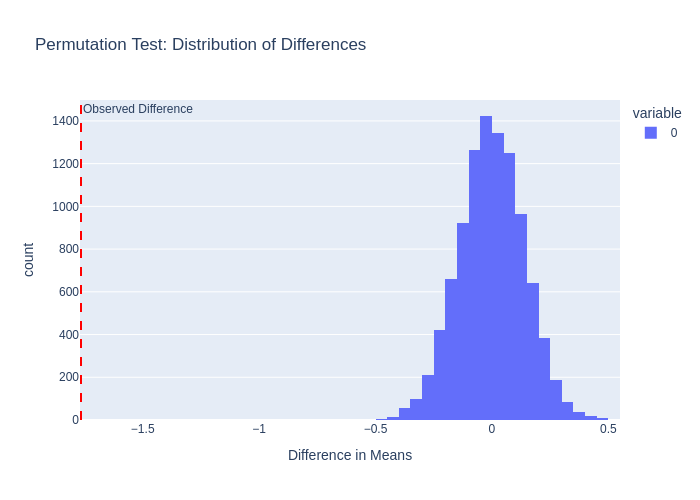

Observed difference in means: -1.765042504866969
P-value from permutation test: 0.0


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Split the dataset into two groups based on the waiting time
short_wait = old_faithful[old_faithful['waiting'] < old_faithful['waiting'].median()]['duration']
long_wait = old_faithful[old_faithful['waiting'] >= old_faithful['waiting'].median()]['duration']

# Observed difference in means
observed_diff = short_wait.mean() - long_wait.mean()

# Combine the two groups
combined = np.concatenate([short_wait, long_wait])
n_short = len(short_wait)
n_long = len(long_wait)

# Number of permutations
n_permutations = 10000
permuted_diffs = []

# Permutation test
for _ in range(n_permutations):
    np.random.shuffle(combined)
    new_short = combined[:n_short]
    new_long = combined[n_short:]
    permuted_diffs.append(new_short.mean() - new_long.mean())

# Calculate p-value
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Visualize the results
fig = px.histogram(permuted_diffs, nbins=30, title="Permutation Test: Distribution of Differences",
                   labels={'value': 'Difference in Means'})
fig.add_vline(x=observed_diff, line_color='red', line_dash='dash', 
               annotation_text='Observed Difference', annotation_position='top right')
fig.show(renderer="png")  # Use for GitHub and MarkUs submissions

# Print results
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")


Splitting the Data: The dataset is split into two groups based on whether the waiting time is below or above the median waiting time.
Calculating the Observed Difference: The difference in means is calculated for the two groups.
Shuffling and Permutation: The labels are shuffled, and the mean difference is recalculated for each permutation.
P-value Calculation: The p-value is computed by finding the proportion of permuted differences that are at least as extreme as the observed difference.
Visualization: A histogram of the permuted differences is created, with a line indicating the observed difference for visual comparison.

### Summary of Chatbot:

Objective:
You aimed to perform a permutation test to evaluate the hypothesis 
𝐻
0
:
𝜇
short
=
𝜇
long
H 
0
​
 :μ 
short
​
 =μ 
long
​
  (no difference in duration between short and long wait times) using the Old Faithful Geyser dataset.

Steps Taken:
Data Preparation:

Loaded the Old Faithful Geyser dataset using Seaborn.
Split the dataset into two groups based on the median of waiting times: short_wait (below median) and long_wait (equal to or above median).
Observed Difference:

Calculated the observed difference in means between the two groups.
Permutation Test:

Combined both groups into one array.
Performed a permutation test by shuffling the combined data multiple times (10,000 permutations) and recalculating the mean difference for each shuffle.
Calculated the p-value by determining the proportion of permuted differences that are at least as extreme as the observed difference.
Visualization:

Created a histogram to visualize the distribution of differences obtained from the permutation test.
Added a vertical line to indicate the observed difference.
Results:

Printed the observed difference in means and the p-value from the permutation test.
Tools and Libraries Used:
Python Libraries: NumPy, Pandas, Seaborn, Plotly Express, and Statsmodels for data manipulation, statistical analysis, and visualization.
This session covered the statistical methodology of conducting a permutation test, along with code implementation to analyze and visualize the results effectively. If you have any further questions or need additional details, feel free to ask!

#### Link: https://chatgpt.com/share/6729493b-74e0-800b-8ed1-160def8ab389

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Yes